# Task-1  Iris Flower Classification

## Data Science Internship-CodeAlpha

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Load CSV
df = pd.read_csv(r"C:\Users\SHUBHASHREE\Desktop\Codealpha\iris.csv")

print(df.head())  # check first few rows

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [13]:
# Drop 'Id' since it’s just a serial number
X = df.drop(["Id", "Species"], axis=1)
y = df["Species"]

# Encode labels (Setosa, Versicolor, Virginica → 0,1,2)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [6]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Task-2 Unemployment Analysis with Python

Dataset Shape: (768, 7)
Columns: ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area']

First 5 rows:
            Region         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019   Monthly                             3.65   
1  Andhra Pradesh   30-06-2019   Monthly                             3.05   
2  Andhra Pradesh   31-07-2019   Monthly                             3.75   
3  Andhra Pradesh   31-08-2019   Monthly                             3.32   
4  Andhra Pradesh   30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.

C:\Users\SHUBHASHREE\AppData\Local\Temp\ipykernel_19044\1895340059.py:27: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


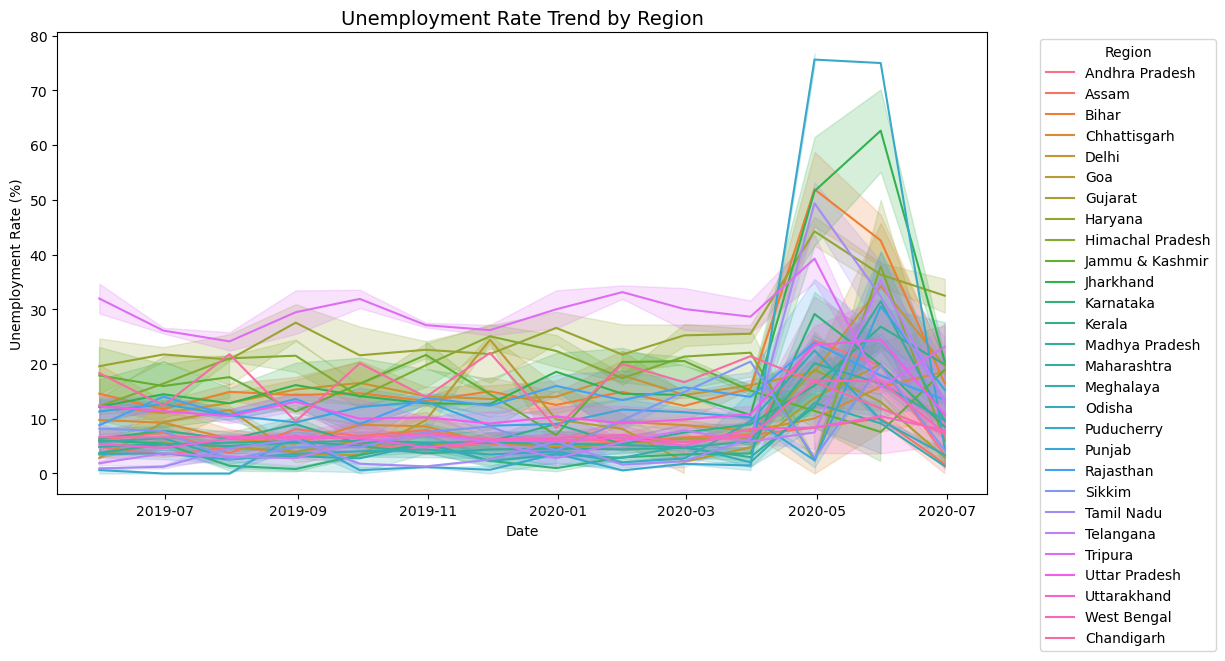

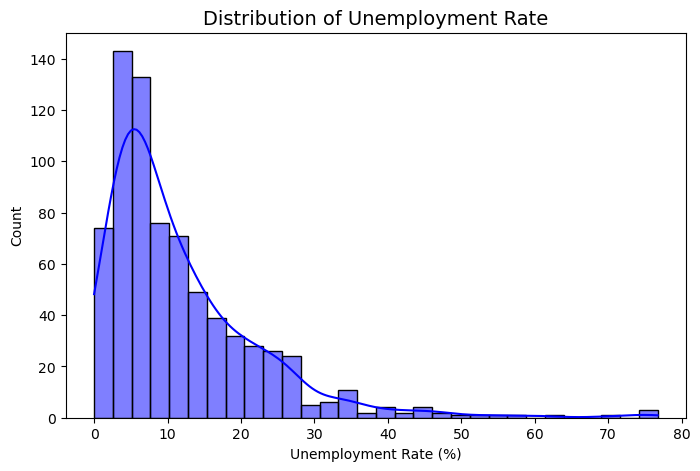

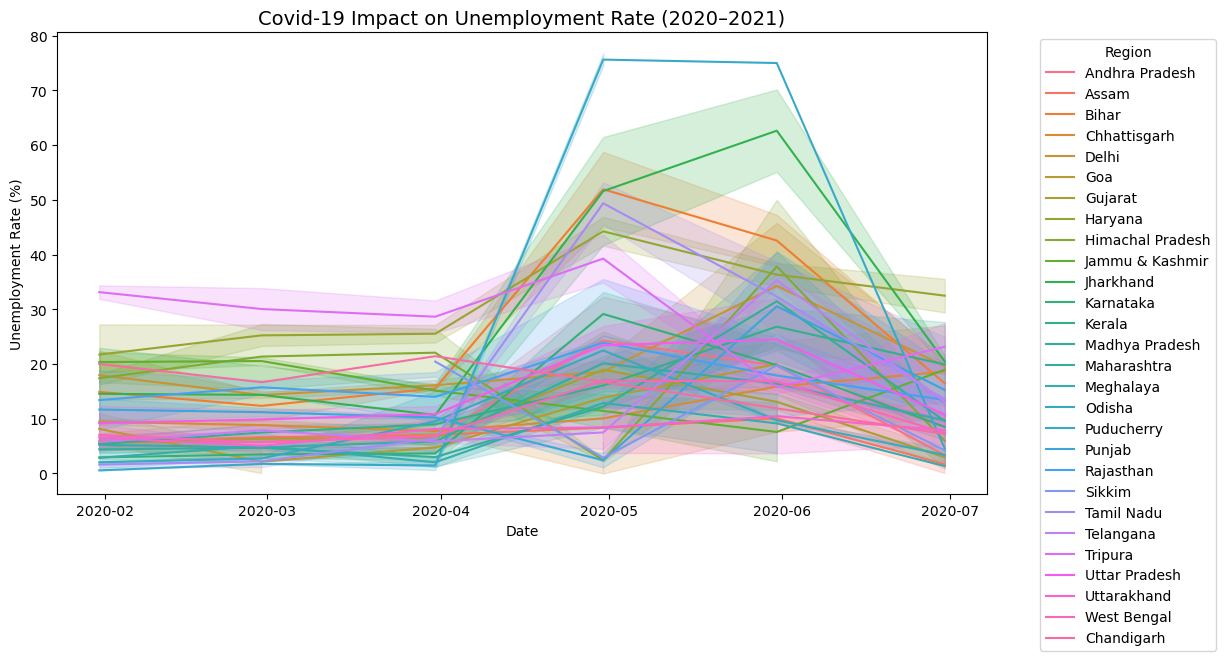

C:\Users\SHUBHASHREE\AppData\Local\Temp\ipykernel_19044\1895340059.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette="viridis")


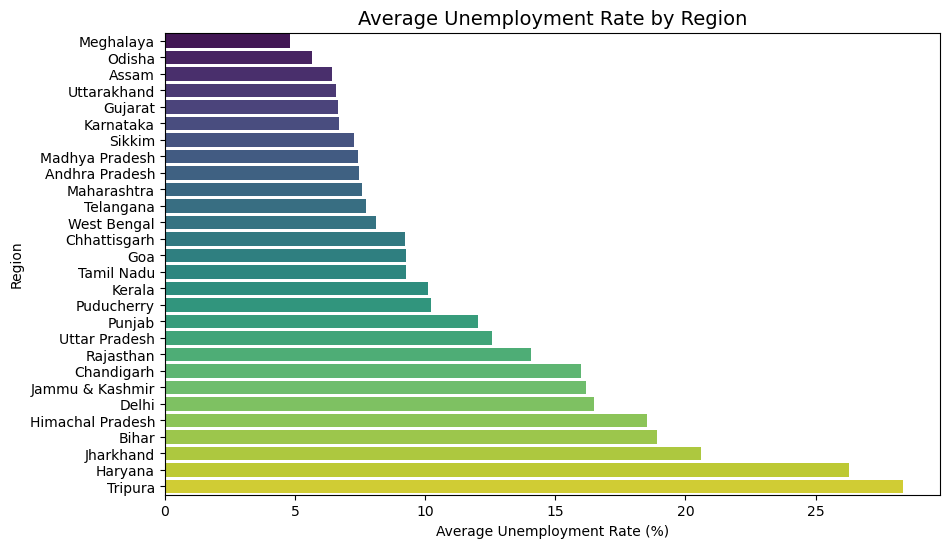

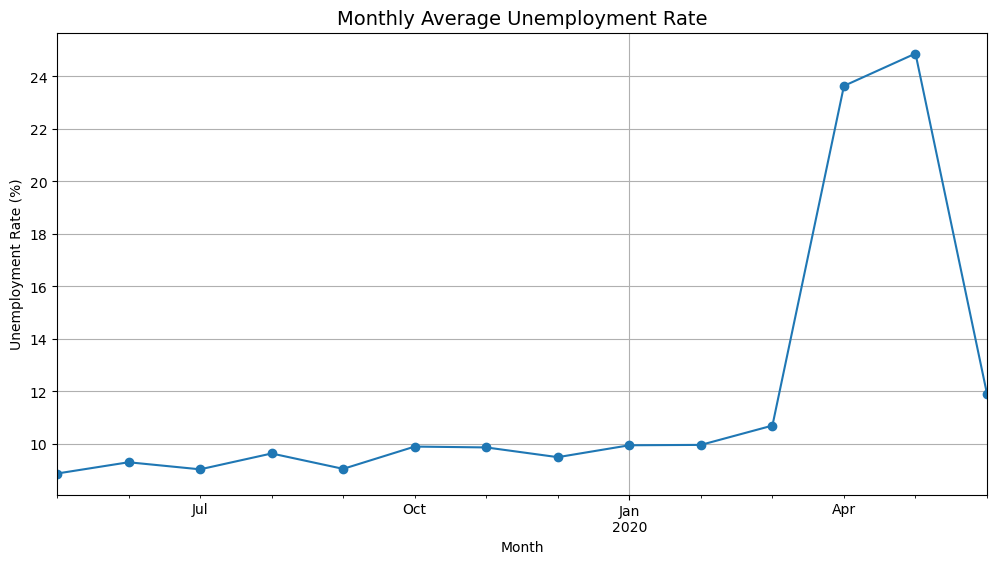

In [7]:
# Task 2: Unemployment Analysis with Python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
df = pd.read_csv(r"C:\Users\SHUBHASHREE\Desktop\Codealpha\Unemployment in India.csv")

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

# -----------------------------
# Step 2: Basic Data Info
# -----------------------------
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

# -----------------------------
# Step 3: Convert Date Column
# -----------------------------
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# -----------------------------
# Step 4: Trend of Unemployment
# -----------------------------
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Estimated Unemployment Rate (%)", hue="Region", lw=1.5)
plt.title("Unemployment Rate Trend by Region", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# -----------------------------
# Step 5: Overall Distribution
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["Estimated Unemployment Rate (%)"], bins=30, kde=True, color="blue")
plt.title("Distribution of Unemployment Rate", fontsize=14)
plt.xlabel("Unemployment Rate (%)")
plt.show()

# -----------------------------
# Step 6: Covid-19 Impact (2020–2021)
# -----------------------------
covid_df = df[(df["Date"] >= "2020-01-01") & (df["Date"] <= "2021-12-31")]

plt.figure(figsize=(12,6))
sns.lineplot(data=covid_df, x="Date", y="Estimated Unemployment Rate (%)", hue="Region", lw=1.5)
plt.title("Covid-19 Impact on Unemployment Rate (2020–2021)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# -----------------------------
# Step 7: Regional Averages
# -----------------------------
region_avg = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette="viridis")
plt.title("Average Unemployment Rate by Region", fontsize=14)
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("Region")
plt.show()

# -----------------------------
# Step 8: Seasonal/Monthly Trend
# -----------------------------
df["Month"] = df["Date"].dt.to_period("M")

monthly_avg = df.groupby("Month")["Estimated Unemployment Rate (%)"].mean()

plt.figure(figsize=(12,6))
monthly_avg.plot(marker="o")
plt.title("Monthly Average Unemployment Rate", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()


# Task-3 Car Price Prediction with Machine Learning

Dataset Shape: (301, 9)
Columns: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Linear Regression Performance:
MAE: 1.22
RMSE: 1.88
R² Score: 0.85

Random Forest Performance:
MAE: 0.62
RMSE: 0.92
R² Score: 0.96


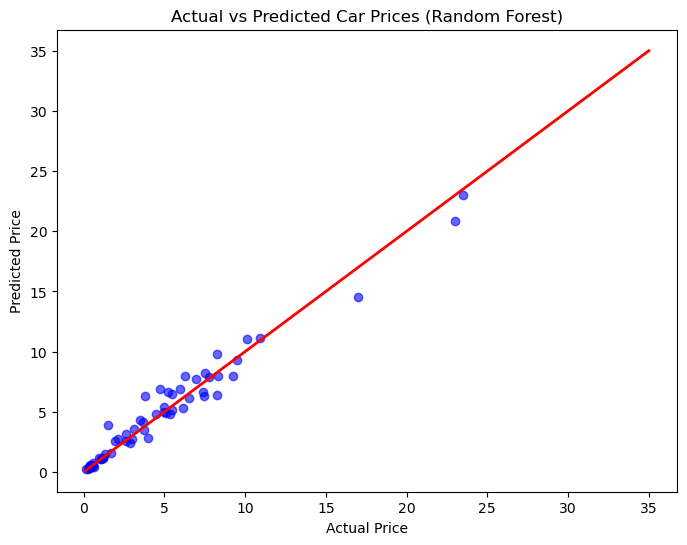

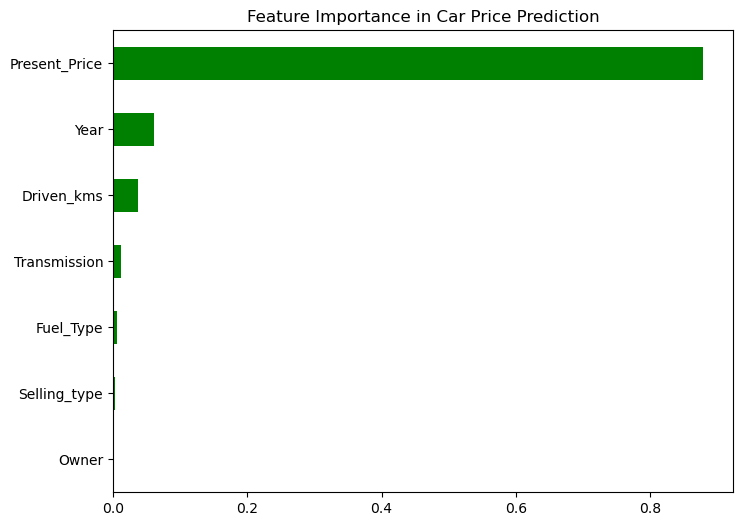

In [13]:
# Task 3: Car Price Prediction with Machine Learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# Step 1: Load Dataset
# -----------------------------
df = pd.read_csv(r"C:\Users\SHUBHASHREE\Desktop\Codealpha\car data.csv")   # <-- replace with your dataset path

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# -----------------------------
# Step 2: Data Preprocessing
# -----------------------------
# Handle missing values
df = df.drop("Car_Name", axis=1)

# Encode categorical features
cat_cols = df.select_dtypes(include=["object"]).columns
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# Define features and target
X = df.drop("Selling_Price", axis=1)   # assuming "Price" is target column
y = df["Selling_Price"]

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# Step 3: Train Models
# -----------------------------
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# -----------------------------
# Step 4: Evaluation
# -----------------------------
def evaluate_model(name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

evaluate_model("Linear Regression", y_test, y_pred_lin)
evaluate_model("Random Forest", y_test, y_pred_rf)

# -----------------------------
# Step 5: Visualization
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color="blue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Random Forest)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", lw=2)  # reference line
plt.show()

# Feature Importance (Random Forest)
importances = rf_reg.feature_importances_
feat_importances = pd.Series(importances, index=df.drop("Selling_Price", axis=1).columns)
feat_importances.sort_values().plot(kind="barh", figsize=(8,6), color="green")
plt.title("Feature Importance in Car Price Prediction")
plt.show()


In [10]:
print("Columns:", df.columns.tolist())

Columns: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
